**Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.**

## About dataset

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. 
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
#shape of the data
df.shape

(3276, 10)

There are 3276 rows and 10 columns

In [3]:
#Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#Dropping missing values
#because water quality is a sensitive data, we cannot tamper with the data by imputing mean, median, mode
df= df.dropna()


In [5]:
df.Potability.value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

<Axes: ylabel='count'>

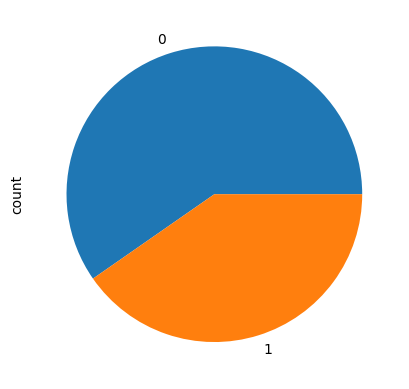

In [6]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns


df.Potability.value_counts().plot(kind ='pie')

Thus it is an imbalanced dataset, since 0 is much more 1 (1998>1278)
So we need to balance the data so that there is no biasedness.

In [7]:
zero  = df[df['Potability']==0]   #zero values in Potability column
one = df[df['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

<Axes: ylabel='count'>

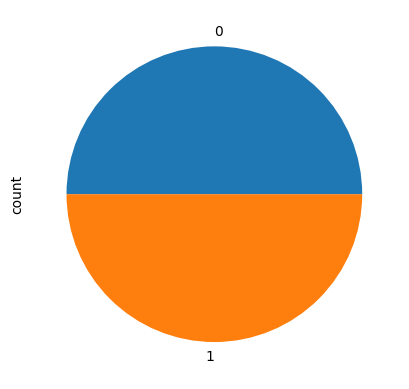

In [8]:
df.Potability.value_counts().plot(kind ='pie')

Now it's perfect!

<Axes: >

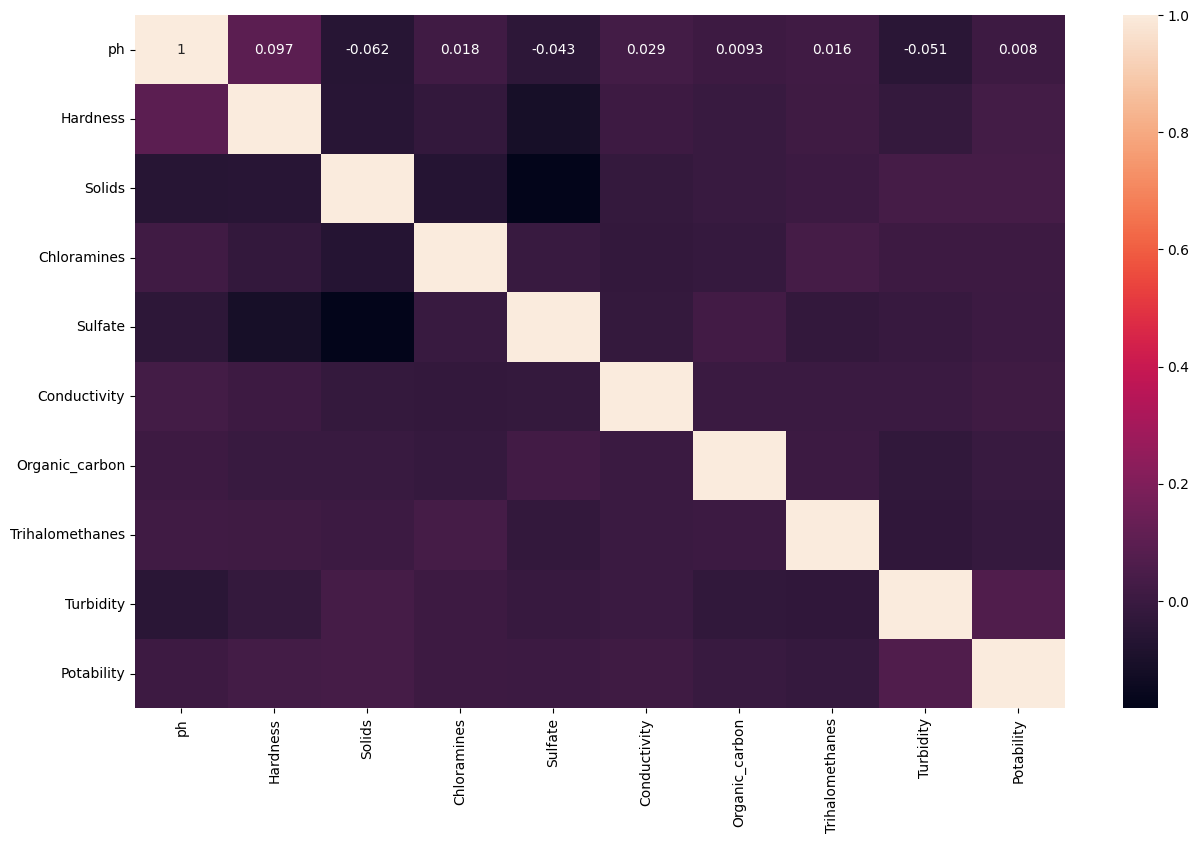

In [9]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='ph', ylabel='Hardness'>

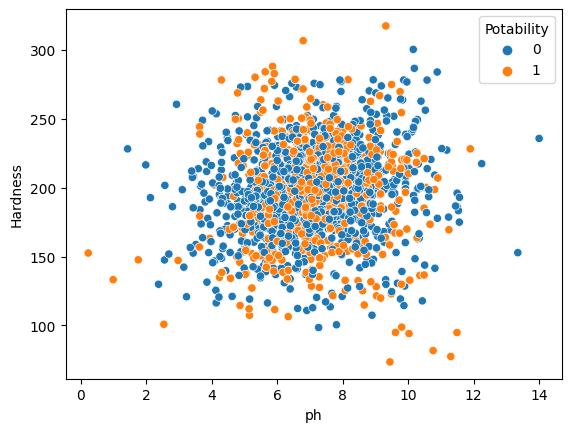

In [10]:
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)


<Axes: xlabel='ph', ylabel='Chloramines'>

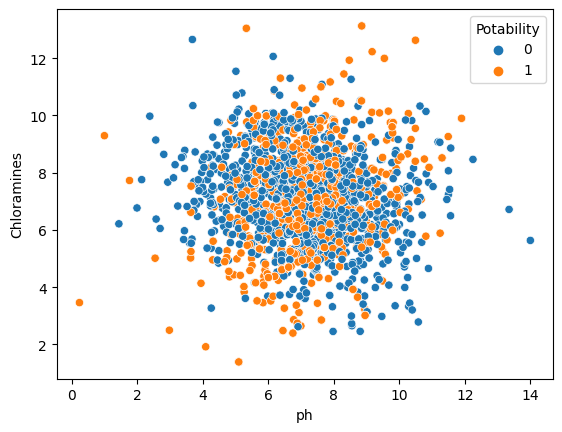

In [11]:
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability,
data=df)

There is no particular pattern!

In [12]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Turbidity          0.065497
Solids             0.029664
Hardness           0.026662
Conductivity       0.015388
Trihalomethanes    0.012615
ph                 0.008044
Chloramines        0.006496
Organic_carbon     0.003727
Sulfate            0.003048
Name: Potability, dtype: float64

highest correlation with Potability is solids with 5.24% only

In [13]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

## Hyper-parameter Tuning ;)

In [17]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [18]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

C:\Users\Dev Barot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dev Barot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dev Barot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dev Barot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 100, 'learning_rate': 0.2}


Wohohhhoooooo! We got the best parameters.

#### Applying bagging and boosting

In [19]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=2, random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=46,
                                                   min_samples_leaf=2,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

In [20]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]


In [21]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.52
K Nearest Neighbours : 0.77
Decision Tree : 0.79
Random Forest : 0.84


C:\Users\Dev Barot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost : 0.67
Bagging Classifier : 0.84
XGBoost : 0.79


Random Forest has performed better.

In [22]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       122
           1       0.84      0.82      0.83       118

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240



The precision of class 0 is 84% and that of class 1 is 85%
It means the model predicts 84% of class 0 and 85% of class 1 correctly

Accuracy is 84%

In [23]:
import joblib

# Assuming your trained SVM model is stored in a variable named 'model'
# Assuming your StandardScaler object is stored in a variable named 'scaler'

# Save the trained model
joblib.dump(rf, 'rf_model.pkl')

# Save the scaler
joblib.dump(sc, 'scaler2.pkl')

['scaler2.pkl']

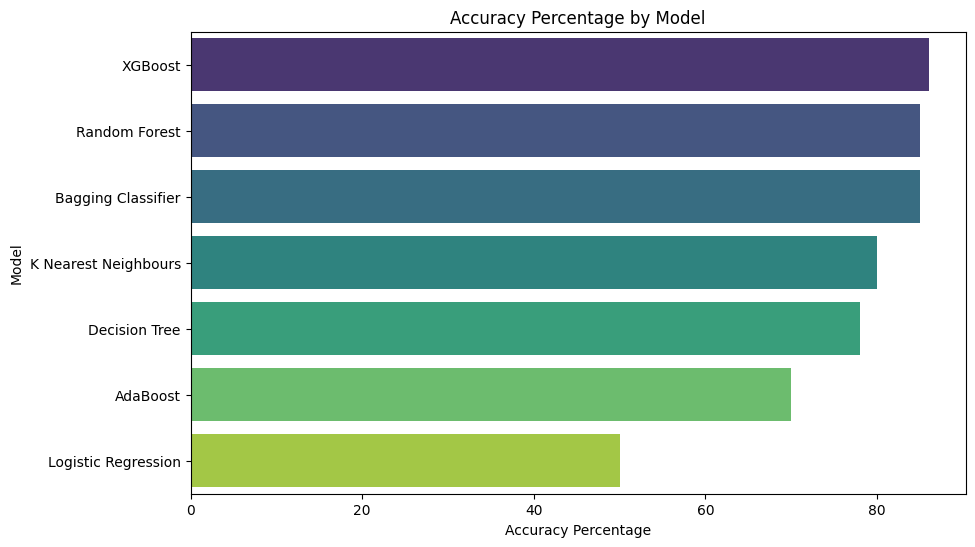

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = {
    'Logistic Regression': 0.50,
    'K Nearest Neighbours': 0.80,
    'Decision Tree': 0.78,
    'Random Forest': 0.85,
    'AdaBoost': 0.70,
    'Bagging Classifier': 0.85,
    'XGBoost': 0.86
}

# Convert accuracy scores to percentages
accuracy_percentages = {model: score * 100 for model, score in accuracy_scores.items()}

# Create DataFrame
models_df = pd.DataFrame(list(accuracy_percentages.items()), columns=['Model', 'Accuracy_percentage'])

# Sort DataFrame by accuracy percentage
models_df = models_df.sort_values(by='Accuracy_percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy_percentage', y='Model', data=models_df, palette='viridis')
plt.title('Accuracy Percentage by Model')
plt.xlabel('Accuracy Percentage')
plt.ylabel('Model')
plt.show()

### Conclusion:
With an accuracy score of 85%, Random Forest is sekected as a final model for performing prediction. The model with the best accuracy will now be used in streamlit app to perform prediction and display the result in front end.

In conclusion, when considering accuracy as the primary metric for model evaluation, Random Forest emerges as the top-performing model in this analysis, followed closely by Bagging Classifier. However, it's essential to consider other factors such as model interpretability, computational efficiency, and suitability for the specific problem domain when selecting the most appropriate model for a given task.